### 1.Data Loading & Initial Inspection

In [144]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/PersonalProjects/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [145]:
!kaggle competitions download -c titanic -p ./data


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [146]:
!unzip ./data/titanic.zip -d ./data


Archive:  ./data/titanic.zip
replace ./data/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [147]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

print(train_df.shape, test_df.shape)
train_df.head()


(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
# 1. Check basic info and column types
print("=== Train Data Info ===")
train_df.info()

print("\n=== Test Data Info ===")
test_df.info()



=== Train Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Test Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pa

In [149]:
# 2. Preview the first 5 rows of training data
print("\n=== Train Data Preview ===")
print(train_df.head())



=== Train Data Preview ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [150]:

# 3. Identify missing values in training data
print("\n=== Missing Values in Train Data ===")
print(train_df.isnull().sum())

# 4. Identify missing values in test data
print("\n=== Missing Values in Test Data ===")
print(test_df.isnull().sum())




=== Missing Values in Train Data ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Missing Values in Test Data ===
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### dealing with missing values

In [151]:
# Fill Embarked missing values with mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Fill Fare missing value in test with median
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Fill Age missing values with median in train and test
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())


In [152]:
print("training data" , train_df.isnull().sum())
print("test data" ,test_df.isnull().sum())

training data PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
test data PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [153]:
print(f"Number of unique cabins: {train_df['Cabin'].unique()}")

train_df['Cabin'] = train_df['Cabin'].fillna('UN')
test_df['Cabin'] = test_df['Cabin'].fillna('UN')

print(f"Number of unique cabins: {train_df['Cabin'].unique()}")

Number of unique cabins: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Number of unique c

In [154]:
import re

def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

# Simplify titles by grouping rare ones
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Don': 'Rare', 'Rev': 'Rare', 'Dr': 'Rare', 'Mme': 'Rare', 'Ms': 'Rare',
    'Major': 'Rare', 'Lady': 'Rare', 'Sir': 'Rare', 'Mlle': 'Rare', 'Col': 'Rare',
    'Capt': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
}

train_df['Title'] = train_df['Title'].map(title_mapping).fillna('Rare')
test_df['Title'] = test_df['Title'].map(title_mapping).fillna('Rare')


### 2.Exploratory Data Analysis - EDA

#### Step 1: Univariate Analysis


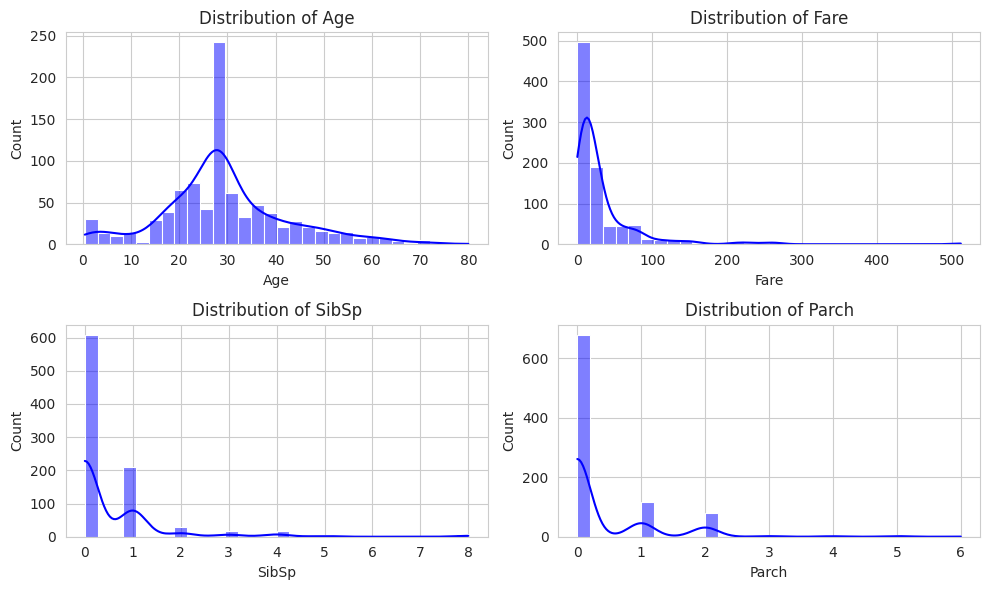

              Age        Fare       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582   32.204208    0.523008    0.381594
std     13.019697   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     35.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# ---- Numerical Features ----
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Summary statistics
print(train_df[numerical_features].describe())



<ipython-input-156-4259a7b5dc79>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Sex', palette='pastel')


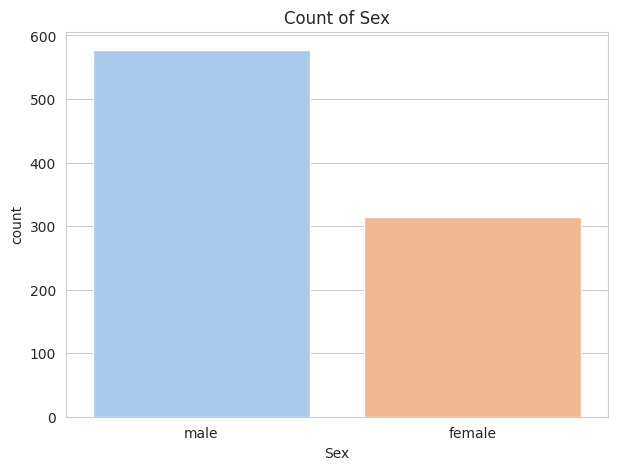

<ipython-input-156-4259a7b5dc79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Pclass', palette='pastel', order=train_df['Pclass'].value_counts().index)


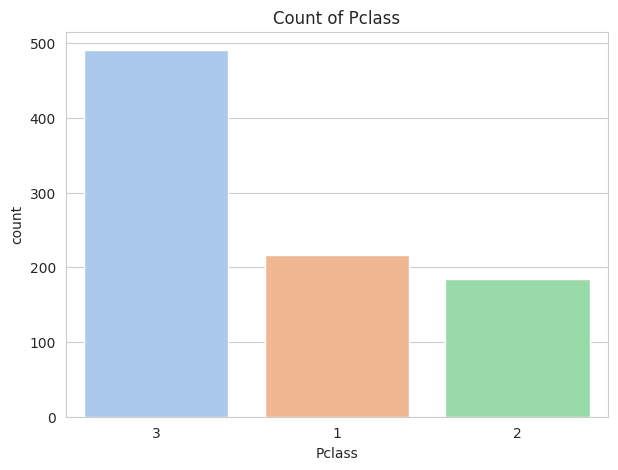

<ipython-input-156-4259a7b5dc79>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Embarked', palette='pastel', order=train_df['Embarked'].value_counts().index)


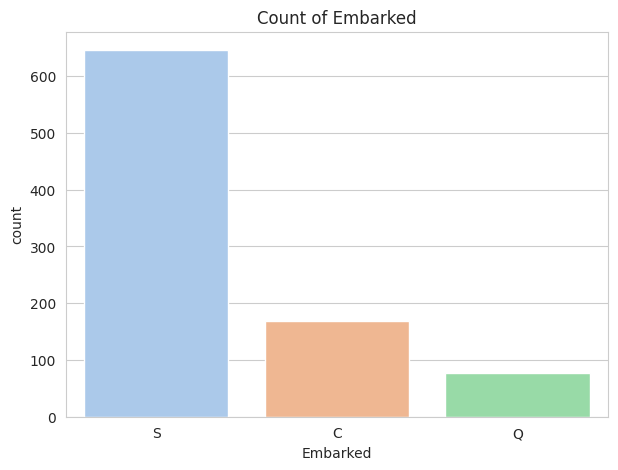

<ipython-input-156-4259a7b5dc79>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Title', palette='pastel', order=train_df['Title'].value_counts().index)


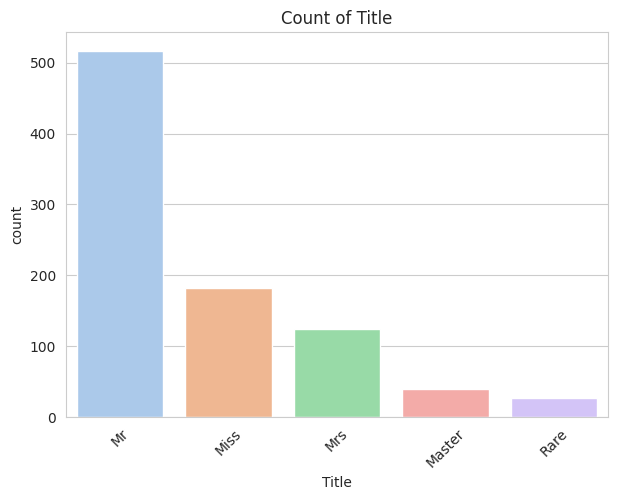

In [156]:

# ---- Categorical Features ----
sns.set_style('whitegrid')

plt.figure(figsize=(7,5))
sns.countplot(data=train_df, x='Sex', palette='pastel')
plt.title('Count of Sex')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(data=train_df, x='Pclass', palette='pastel', order=train_df['Pclass'].value_counts().index)
plt.title('Count of Pclass')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(data=train_df, x='Embarked', palette='pastel', order=train_df['Embarked'].value_counts().index)
plt.title('Count of Embarked')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(data=train_df, x='Title', palette='pastel', order=train_df['Title'].value_counts().index)
plt.title('Count of Title')
plt.xticks(rotation=45)
plt.show()



#### Step 2: Bivariate Analysis: exploring relationships between features and survival outcome.

<ipython-input-157-0de1e84b4b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Sex', y='Survived', palette='pastel')


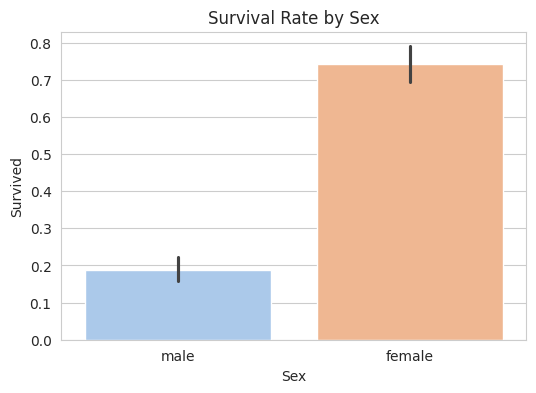

In [157]:
# 1. Survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(data=train_df, x='Sex', y='Survived', palette='pastel')
plt.title('Survival Rate by Sex')
plt.show()


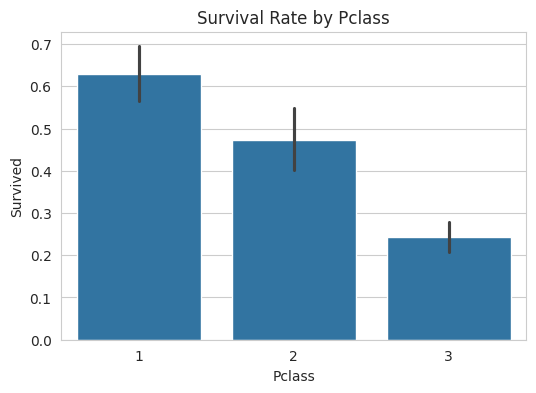

In [158]:

# 2. Survival rate by Pclass
plt.figure(figsize=(6,4))
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')
plt.show()


<ipython-input-159-3a3bceec3d58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Embarked', y='Survived', palette = 'pastel')


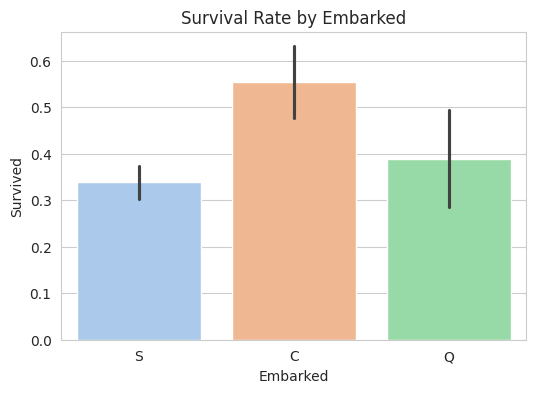

In [159]:

# 3. Survival rate by Embarked
plt.figure(figsize=(6,4))
sns.barplot(data=train_df, x='Embarked', y='Survived', palette = 'pastel')
plt.title('Survival Rate by Embarked')
plt.show()


<ipython-input-160-38d10581450c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Title', y='Survived', palette='pastel', order=train_df['Title'].value_counts().index)


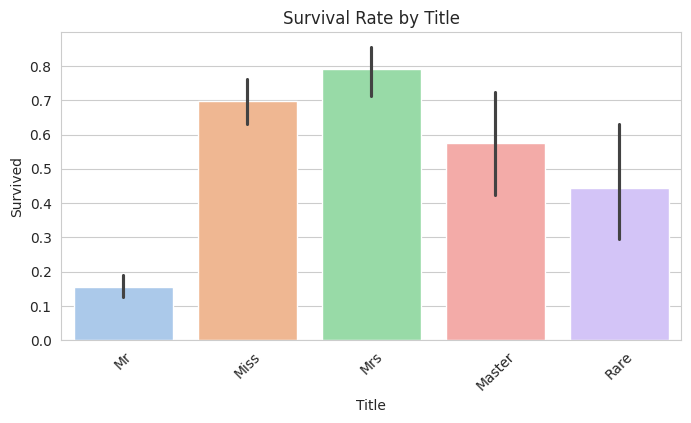

In [160]:

# 4. Survival rate by Title
plt.figure(figsize=(8,4))
sns.barplot(data=train_df, x='Title', y='Survived', palette='pastel', order=train_df['Title'].value_counts().index)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()




<ipython-input-161-718c5825e8dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Survived', y='Age', palette='pastel')


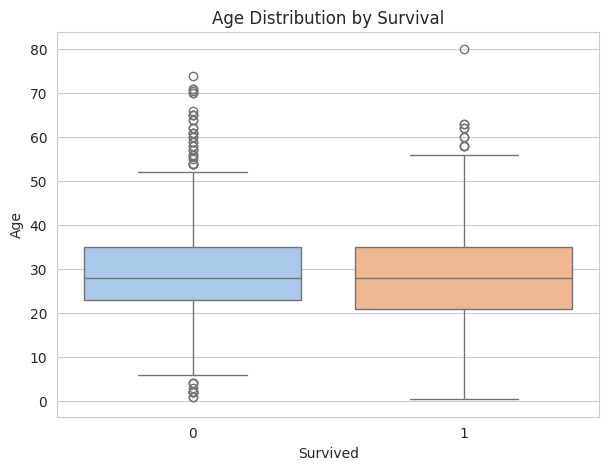

In [161]:

# 5. Age distribution by Survival
plt.figure(figsize=(7,5))
sns.boxplot(data=train_df, x='Survived', y='Age', palette='pastel')
plt.title('Age Distribution by Survival')
plt.show()


<ipython-input-162-aa557a1cc181>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Survived', y='Fare', palette='pastel')


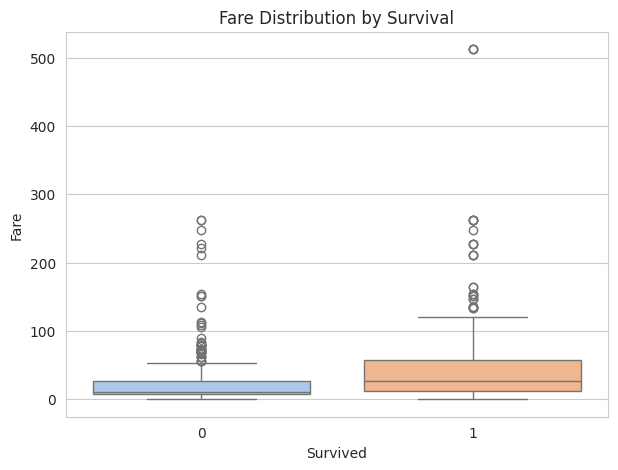

In [162]:

# 6. Fare distribution by Survival
plt.figure(figsize=(7,5))
sns.boxplot(data=train_df, x='Survived', y='Fare', palette='pastel')
plt.title('Fare Distribution by Survival')
plt.show()

#### Step 3: Correlation Analysis

Correlation matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


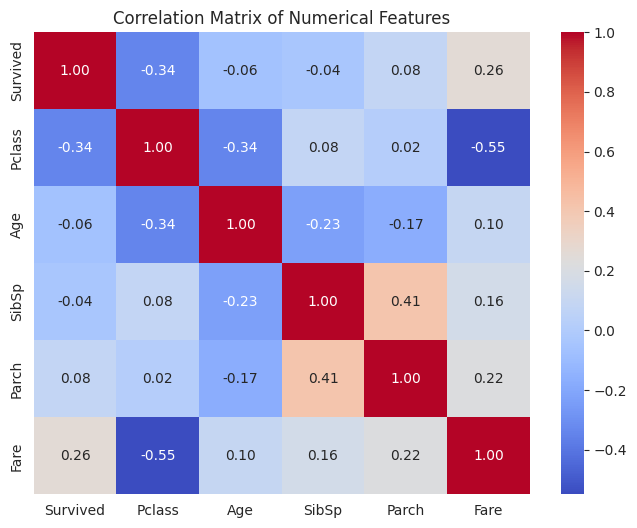

In [163]:
# Select numerical features including the target
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Compute correlation matrix
corr_matrix = train_df[numerical_features].corr()

# Display correlation matrix
print("Correlation matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Great! Let me help you interpret the correlation matrix:

---

##### Key insights from correlations with **Survived**:

* **Pclass (-0.338):** Moderate negative correlation — lower class (higher number) passengers tended to survive less.
* **Fare (0.257):** Moderate positive correlation — passengers who paid higher fares had better survival chances.
* **Age (-0.065):** Very weak negative correlation — younger passengers survived slightly more but not strongly correlated overall.
* **Parch (0.082) & SibSp (-0.035):** Very weak correlations — family size components alone don’t strongly predict survival.
* **Survived with itself:** 1, as expected.

---

##### Correlations among features:

* **Pclass and Fare (-0.55):** Strong negative correlation, reflecting that higher classes paid more.
* **SibSp and Parch (0.41):** Moderate positive correlation — family relationships tend to co-occur.
* **Age and Pclass (-0.34):** Younger passengers tended to be in higher classes.

---


#### Step 4: Outlier Detection

We focus on Age and Fare because they’re continuous numerical variables with meaningful, potentially extreme values that can affect model training, unlike the other features.


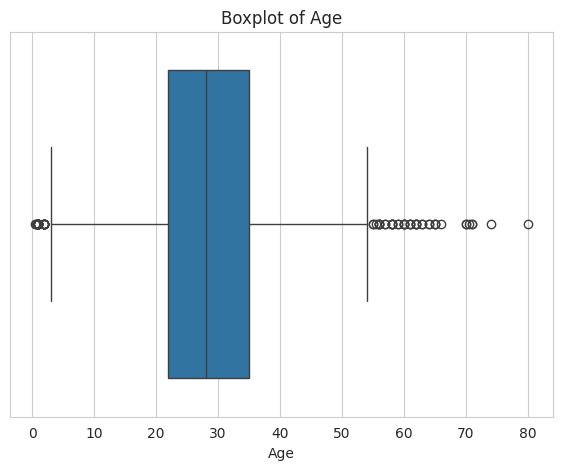

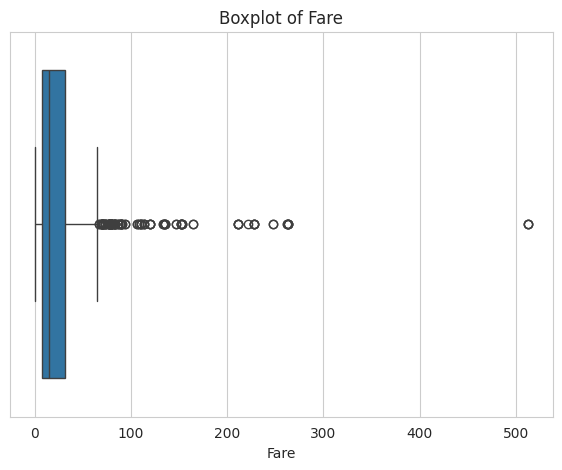

Number of Age outliers: 66
Number of Fare outliers: 116
Age outliers example values:
[ 2.   58.   55.   66.   65.    0.83 59.   71.   70.5  55.5 ]
Fare outliers example values:
[ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
  77.2875 247.5208]


In [164]:
# Boxplot for Age
plt.figure(figsize=(7, 5))
sns.boxplot(x=train_df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(7, 5))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


# IQR method to identify outliers
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

age_outliers = find_outliers_IQR(train_df['Age'])
fare_outliers = find_outliers_IQR(train_df['Fare'])

print(f"Number of Age outliers: {age_outliers.count()}")
print(f"Number of Fare outliers: {fare_outliers.count()}")

print(f"Age outliers example values:\n{age_outliers.unique()[:10]}")
print(f"Fare outliers example values:\n{fare_outliers.unique()[:10]}")

#### Handling Outliers

Age:
Since those extremes are real (babies and elderly), it’s usually best to keep them as is — they carry meaningful info.

Fare:
High fare values can skew the distribution. To reduce skewness and mitigate outlier effect, apply a log transformation (e.g., log(Fare + 1) to avoid log(0)).

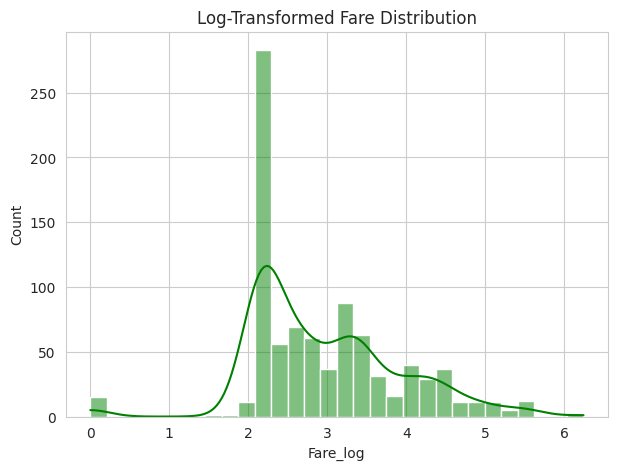

In [165]:
# Apply log transformation to Fare
train_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])

# Plot the log-transformed Fare distribution
plt.figure(figsize=(7,5))
sns.histplot(train_df['Fare_log'], kde=True, color='green', bins=30)
plt.title('Log-Transformed Fare Distribution')
plt.show()

#### Step 5: Missing Data Visualization

<Figure size 500x400 with 0 Axes>

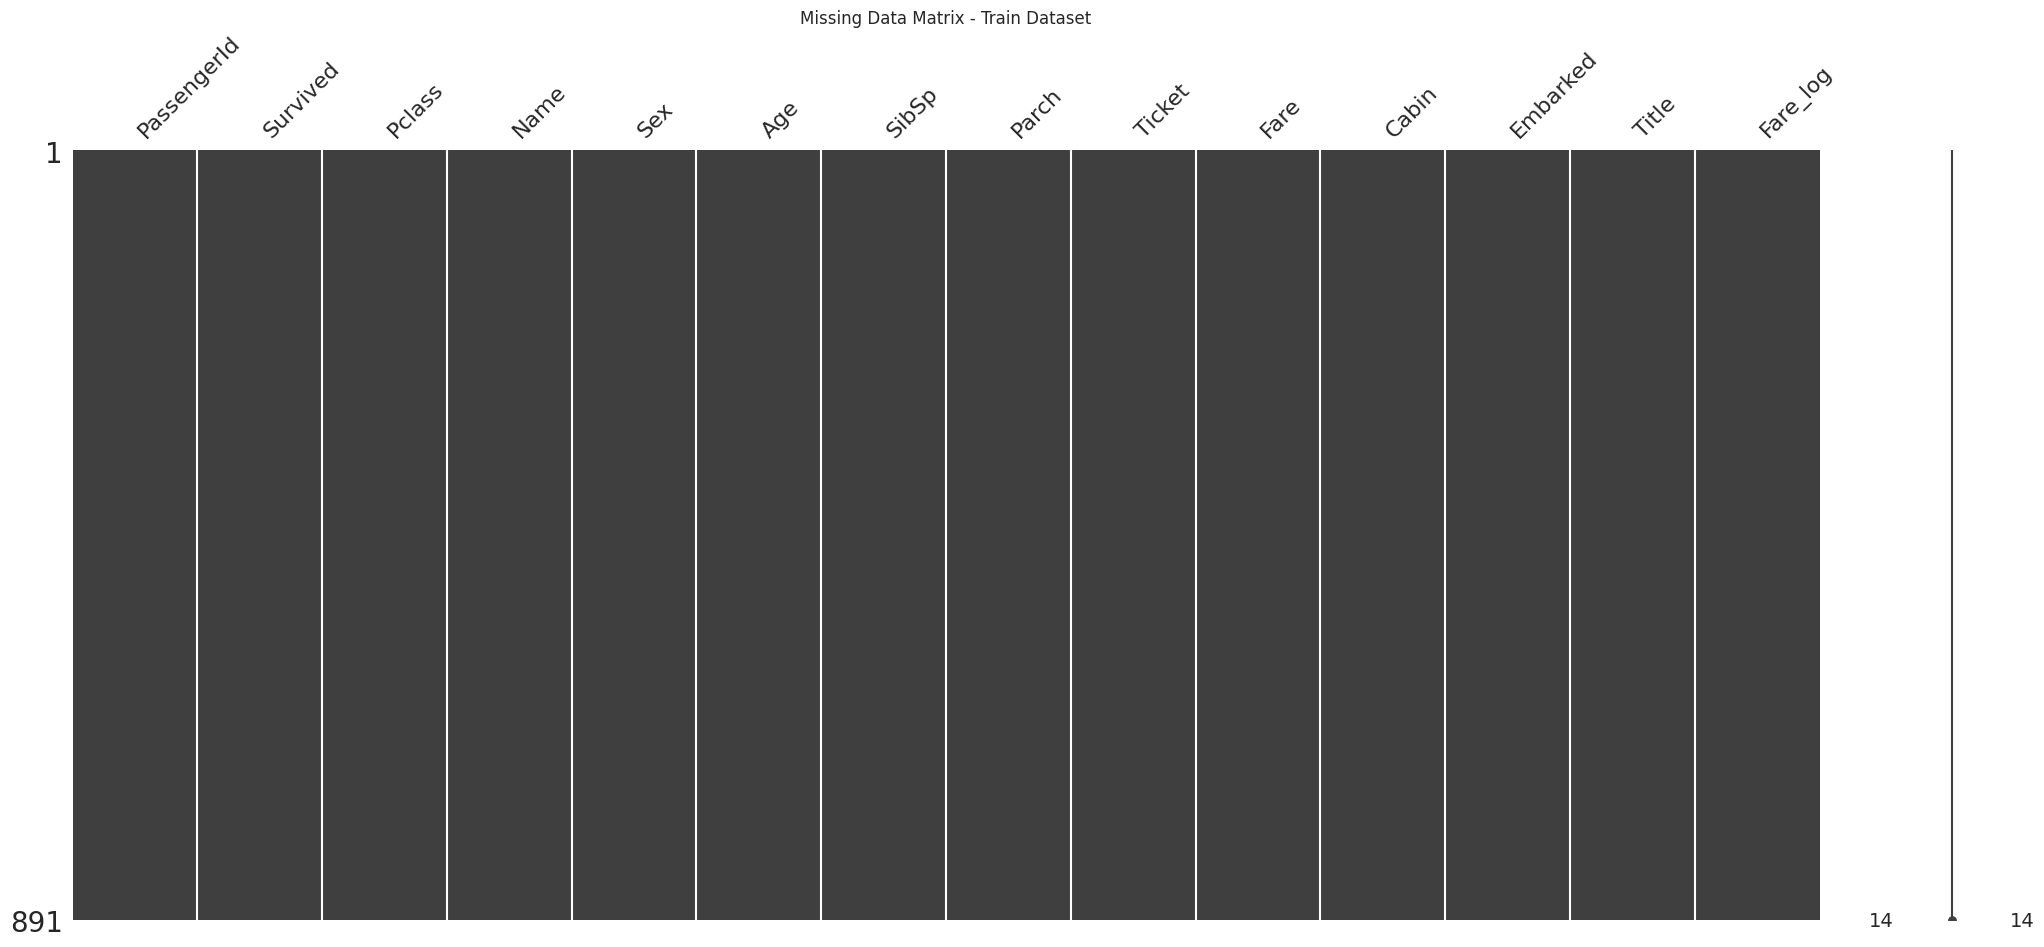

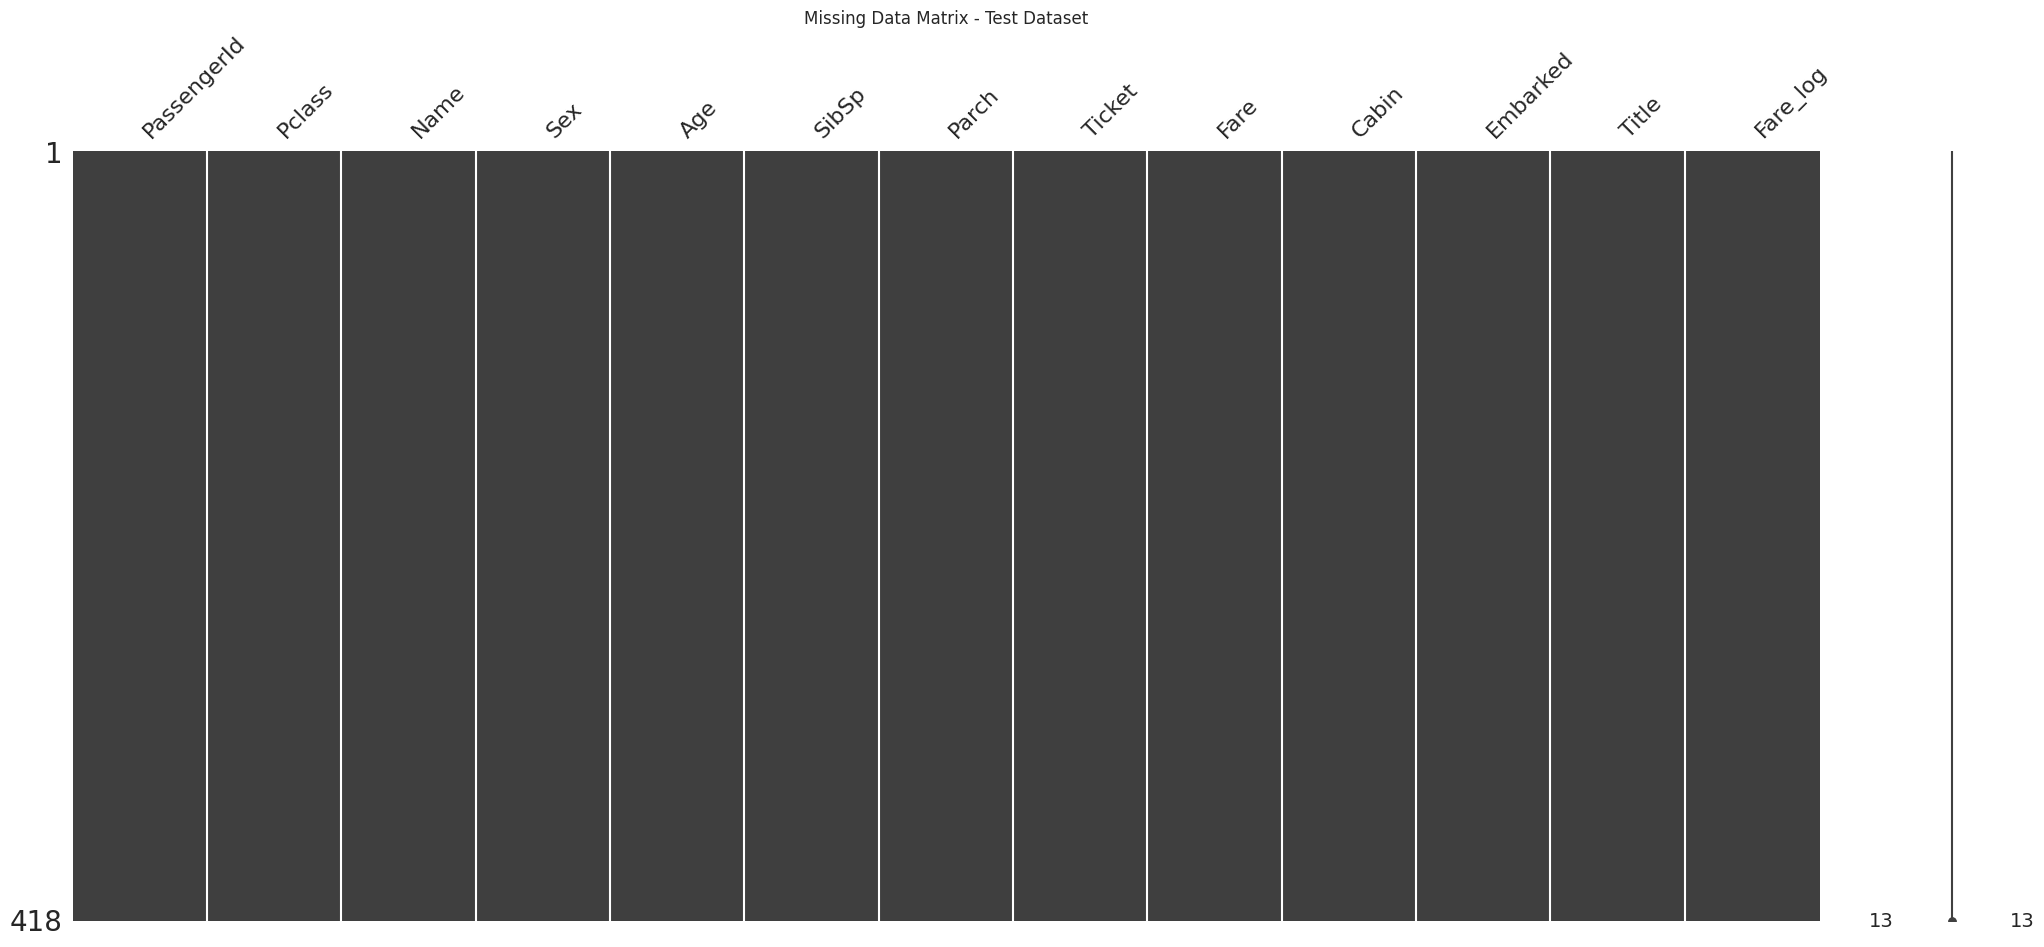

In [166]:
# Install missingno if not installed
!pip install missingno

import missingno as msno


# Visualize missing data in train dataset
plt.figure(figsize=(5,4))
msno.matrix(train_df)
plt.title("Missing Data Matrix - Train Dataset")
plt.show()

# Visualize missing data in test dataset
msno.matrix(test_df)
plt.title("Missing Data Matrix - Test Dataset")
plt.show()


### 3.Feature Engineering

FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


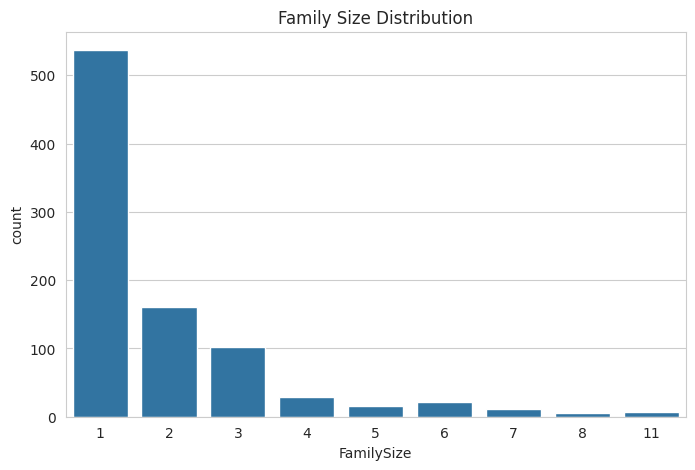

In [167]:
# Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Check distribution
print(train_df['FamilySize'].value_counts().sort_index())

# Visualize FamilySize distribution
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='FamilySize')
plt.title('Family Size Distribution')
plt.show()


#### Label Encoding for these categorical columns:

In [168]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Sex', 'Embarked', 'Title']

for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])


#### Create Interaction Features

In [169]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_df['Sex_Pclass'] = train_df['Sex'].astype(str) + "_" + train_df['Pclass'].astype(str)
test_df['Sex_Pclass'] = test_df['Sex'].astype(str) + "_" + test_df['Pclass'].astype(str)

# Reshape and fit-transform train
train_vals = train_df[['Sex_Pclass']].values
test_vals = test_df[['Sex_Pclass']].values

encoder.fit(train_vals)

train_df['Sex_Pclass_enc'] = encoder.transform(train_vals).astype(int)
test_df['Sex_Pclass_enc'] = encoder.transform(test_vals).astype(int)


In [170]:
# Create interaction features
train_df['Title_Pclass'] = train_df['Title'].astype(str) + "_" + train_df['Pclass'].astype(str)
test_df['Title_Pclass'] = test_df['Title'].astype(str) + "_" + test_df['Pclass'].astype(str)

train_df['FamilySize_Pclass'] = train_df['FamilySize'].astype(str) + "_" + train_df['Pclass'].astype(str)
test_df['FamilySize_Pclass'] = test_df['FamilySize'].astype(str) + "_" + test_df['Pclass'].astype(str)

train_df['Sex_Embarked'] = train_df['Sex'].astype(str) + "_" + train_df['Embarked'].astype(str)
test_df['Sex_Embarked'] = test_df['Sex'].astype(str) + "_" + test_df['Embarked'].astype(str)

# Combine train and test interaction features for consistent categories
for col in ['Title_Pclass', 'FamilySize_Pclass', 'Sex_Embarked']:
    combined = pd.concat([train_df[col], test_df[col]])
    combined_cat = pd.Categorical(combined)

    train_df[col + '_enc'] = combined_cat.codes[:len(train_df)]
    test_df[col + '_enc'] = combined_cat.codes[len(train_df):]



#### Plot of the distribution of encoded features in train data

In [171]:
print(train_df.columns)

for col in encoded_features:
    if col in train_df.columns:
        print(f"\n{col} value counts:")
        print(train_df[col].value_counts())
    else:
        print(f"{col} does NOT exist in train_df")


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Fare_log',
       'FamilySize', 'Sex_Pclass', 'Sex_Pclass_enc', 'Title_Pclass',
       'FamilySize_Pclass', 'Sex_Embarked', 'Title_Pclass_enc',
       'FamilySize_Pclass_enc', 'Sex_Embarked_enc'],
      dtype='object')

Title_Pclass_enc value counts:
Title_Pclass_enc
8     319
6     107
5     102
7      91
3      46
9      42
11     42
10     41
4      34
2      28
12     18
1       9
13      9
0       3
Name: count, dtype: int64

FamilySize_Pclass_enc value counts:
FamilySize_Pclass_enc
3     324
1     109
2     104
4      70
6      57
9      47
5      34
8      31
7      24
18     17
11     13
15     12
19     12
12      9
0       7
10      7
20      6
16      4
13      2
17      1
14      1
Name: count, dtype: int64

Sex_Embarked_enc value counts:
Sex_Embarked_enc
5    441
2    205
3     95
0     73
4     41
1     36
Name: count, dtype: int64


<ipython-input-172-1da97b36acaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x=col, y='Survived', palette='pastel')
<ipython-input-172-1da97b36acaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x=col, y='Survived', palette='pastel')
<ipython-input-172-1da97b36acaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x=col, y='Survived', palette='pastel')


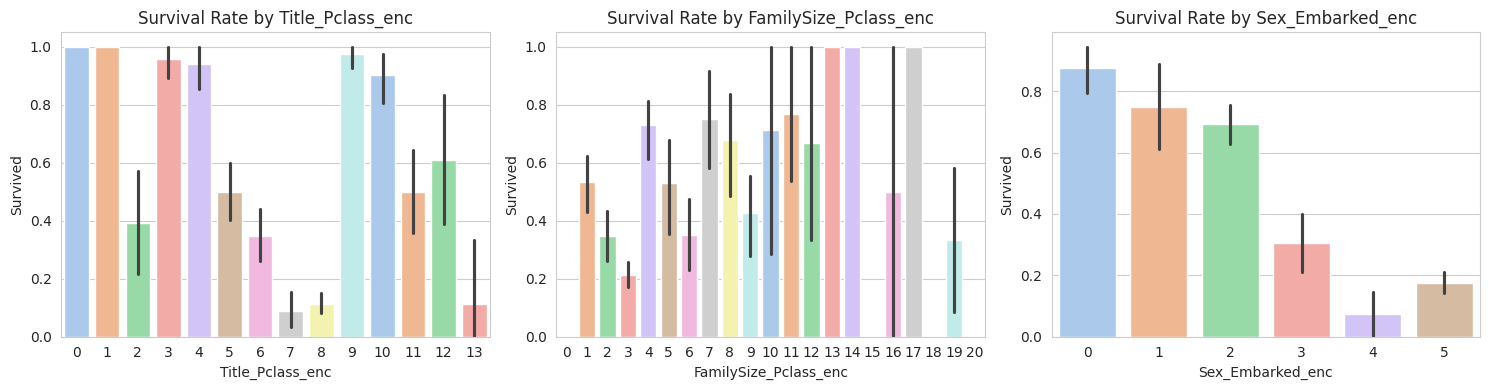

In [172]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(['Title_Pclass_enc', 'FamilySize_Pclass_enc', 'Sex_Embarked_enc'], 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=train_df, x=col, y='Survived', palette='pastel')
    plt.title(f'Survival Rate by {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


#### Feature Scaling / Transformation


In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_features = ['Age', 'Fare_log', 'FamilySize']

# Fit scaler on train, transform both train and test
train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features] = scaler.transform(test_df[num_features])


#### Handle Rare Categories and Missing Values

In [174]:
print("Missing values in train after transformations:")
print(train_df.isnull().sum())

print("\nMissing values in test after transformations:")
print(test_df.isnull().sum())


Missing values in train after transformations:
PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Embarked                 0
Title                    0
Fare_log                 0
FamilySize               0
Sex_Pclass               0
Sex_Pclass_enc           0
Title_Pclass             0
FamilySize_Pclass        0
Sex_Embarked             0
Title_Pclass_enc         0
FamilySize_Pclass_enc    0
Sex_Embarked_enc         0
dtype: int64

Missing values in test after transformations:
PassengerId              0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Em

### Modeling

In [175]:
# Features and target from train_df
feature_cols = [
    'Pclass', 'Sex', 'Age', 'Fare_log', 'FamilySize',
    'Embarked', 'Title',
    'Sex_Pclass_enc', 'Title_Pclass_enc', 'FamilySize_Pclass_enc', 'Sex_Embarked_enc'
]

X = train_df[feature_cols]
y = train_df['Survived']

from sklearn.model_selection import train_test_split

# Split train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Validate
y_pred = model.predict(X_val)
from sklearn.metrics import accuracy_score, classification_report
print("Validation Accuracy on Logistic Regression:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Predict on test set (no labels)
X_test = test_df[feature_cols]
test_pred = model.predict(X_test)


Validation Accuracy on Logistic Regression: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [176]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


Random Forest Validation Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.79      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



####  hyperparameter tuning using RandomizedSearchCV

In [177]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best cross-validation accuracy:  0.8328080370333891


In [178]:
best_xgb = random_search.best_estimator_
y_val_pred = best_xgb.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report
print("Validation Accuracy after tuning:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Validation Accuracy after tuning: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [179]:
test_pred = best_xgb.predict(X_test)


In [180]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})

# Save to CSV (no index)
submission.to_csv('titanic_submission.csv', index=False)


### Model Interpretation & Explainability with SHAP

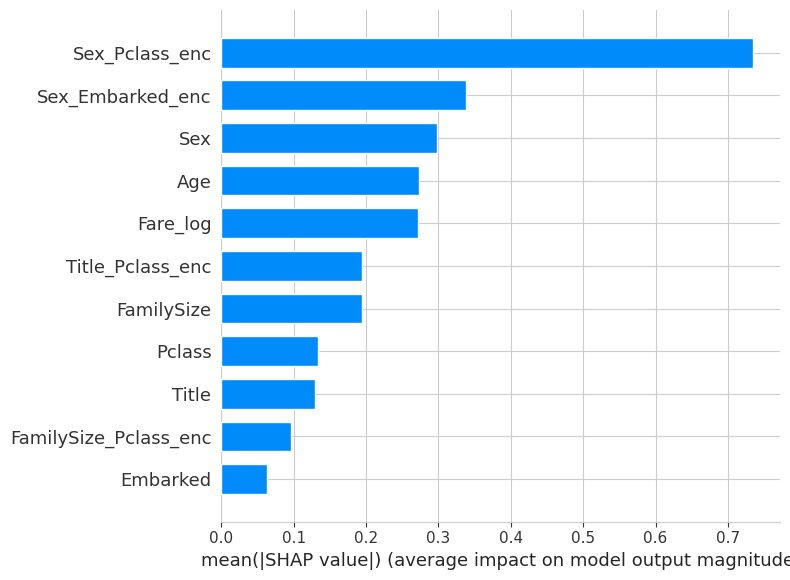

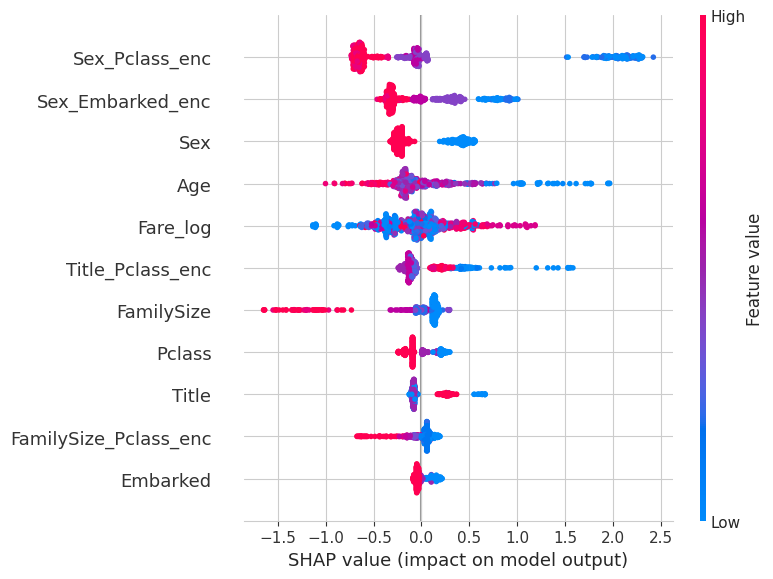

In [181]:
import shap
shap.initjs()

# Use the best XGBoost model (best_xgb)
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

# Global feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed global summary plot
shap.summary_plot(shap_values, X_train)



In [182]:

shap.initjs()

# explain one prediction (local explanation)
idx = 0  # first sample in training set
shap.force_plot(explainer.expected_value, shap_values[idx], X_train.iloc[idx])

In [183]:
# Retrain model on full training data
best_xgb.fit(X, y)

# Predict on test data
test_pred = best_xgb.predict(test_df[feature_cols])

# Prepare submission CSV
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})

submission.to_csv('titanic_final_submission.csv', index=False)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
